# Pandas: conhecendo a biblioteca

### Aula 1 - Conhecendo a base de dados

1) Importe o arquivo alunos.csv e armazene seu conteúdo em um DataFrame Pandas.

In [7]:
import pandas as pd

alunos = pd.read_csv("alunos.csv")

2) Visualize as primeiras 7 linhas do DataFrame e as 5 últimas.

In [8]:
alunos.head(7)

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True


3) Confira a quantidade de linhas e colunas desse DataFrame.

In [9]:
alunos.shape

(18, 4)

4) Explore as colunas do DataFrame e analise os tipos dos dados presentes em cada coluna.

In [10]:
alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Nome      18 non-null     object 
 1   Idade     18 non-null     int64  
 2   Notas     12 non-null     float64
 3   Aprovado  18 non-null     bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 582.0+ bytes


Extra: Calcule algumas estatísticas descritivas básicas dos dados do DataFrame (média, desvio padrão, etc). 

In [11]:
alunos.describe()

,Idade,Notas
count,18.000000,12.000000
mean,25.500000,6.800000
std,6.070662,2.204953
min,18.000000,2.500000
25%,21.000000,5.450000
50%,24.500000,7.000000
75%,28.750000,8.250000
max,37.000000,10.000000


### Aula 2 - Análise exploratória de dados

In [15]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
aluguel = pd.read_csv(url, sep=";")

aluguel.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


1) Calcular a média de quartos por apartamento.

In [17]:
aluguel["Quartos"].mean()

1.7713895631067962

2) Conferir quantos bairros únicos existem na nossa base de dados.

In [22]:
aluguel["Bairro"].nunique()

162

3) Analisar quais bairros possuem a média de valor de aluguel mais elevadas.

In [23]:
media_aluguel_por_bairro = aluguel.groupby('Bairro')['Valor'].mean()

media_aluguel_por_bairro = media_aluguel_por_bairro.sort_values(ascending=False)

media_aluguel_por_bairro.head()

Bairro
Jacarepaguá      314143.489637
Irajá            154610.470588
Caju             120264.782609
Vasco da Gama    120000.000000
Cidade Nova       88166.692308
Name: Valor, dtype: float64

4) Criar um gráfico de barras horizontais que apresente os 5 bairros com as médias de valores de aluguel mais elevadas.

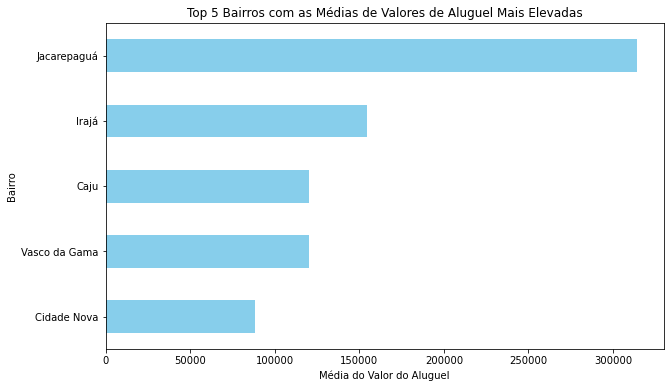

In [25]:
import matplotlib.pyplot as plt

top_5_bairros = media_aluguel_por_bairro.head(5)

plt.figure(figsize=(10, 6))
top_5_bairros.plot(kind='barh', color='skyblue')
plt.xlabel('Média do Valor do Aluguel')
plt.ylabel('Bairro')
plt.title('Top 5 Bairros com as Médias de Valores de Aluguel Mais Elevadas')
plt.gca().invert_yaxis() 
plt.show()

### Aula 4

1) Os alunos participaram de uma atividade extracurricular e ganharam pontos extras. Esses pontos extras correspondem a 40% da nota atual de cada um deles. Com base nisso, crie uma coluna chamada "Pontos_extras" que contenha os pontos extras de cada aluno, ou seja, 40% da nota atual deles.

In [29]:
alunos['Pontos_extras'] = alunos.apply(lambda row: row['Notas'] * 0.40, axis=1)

alunos.head()

,Nome,Idade,Notas,Aprovado,Pontos_extras
0,Ary,20,7.5,True,3.0
1,Ana,18,NaN,False,NaN
2,Cátia,27,2.5,False,1.0
3,Denis,18,5.0,False,2.0
4,Beto,21,10.0,True,4.0


2) Crie mais uma coluna, chamada "Notas_finais" que possua as notas de cada aluno somada com os pontos extras.

In [31]:
alunos["Notas_finais"] = alunos.apply(lambda row: row['Notas']  + row["Pontos_extras"], axis=1)

alunos.head()

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais
0,Ary,20,7.5,True,3.0,10.5
1,Ana,18,NaN,False,NaN,NaN
2,Cátia,27,2.5,False,1.0,3.5
3,Denis,18,5.0,False,2.0,7.0
4,Beto,21,10.0,True,4.0,14.0


3) Como houve uma pontuação extra, alguns alunos que não tinham sido aprovados antes podem ter sido aprovados agora. Com base nisso, crie uma coluna chamada "Aprovado_final" com os seguintes valores:

True: caso o aluno esteja aprovado (nota final deve ser maior ou igual a 6);\
False: caso o aluno esteja reprovado (nota final deve ser menor que 6).

In [45]:
alunos['Aprovado_final'] = alunos.apply(lambda row: True if row["Notas_finais"] >= 6 else False, axis=1)

alunos.head()

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
0,Ary,20,7.5,True,3.0,10.5,True
1,Ana,18,NaN,False,NaN,NaN,False
2,Cátia,27,2.5,False,1.0,3.5,False
3,Denis,18,5.0,False,2.0,7.0,True
4,Beto,21,10.0,True,4.0,14.0,True


4) Faça uma seleção e verifique quais alunos não tinham sido aprovados anteriormente, mas foram aprovados após a soma dos pontos extras.

In [46]:
alunos_aprovados_pos = []

alunos.apply(lambda row: alunos_aprovados_pos.append(row["Nome"]) if row["Aprovado"] == False and row["Aprovado_final"] == True else None, axis=1)

alunos_aprovados_pos

['Denis', 'Alice', 'Igor']